### Eda para Ml

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df_target = pd.read_parquet('google_yelp_target.parquet',engine='pyarrow')
df = pd.read_parquet('google_yelp.parquet',engine='pyarrow')
#df = pd.read_parquet('google_yelp_procesado_mvp.parquet',engine='pyarrow')

<AxesSubplot: ylabel='count'>

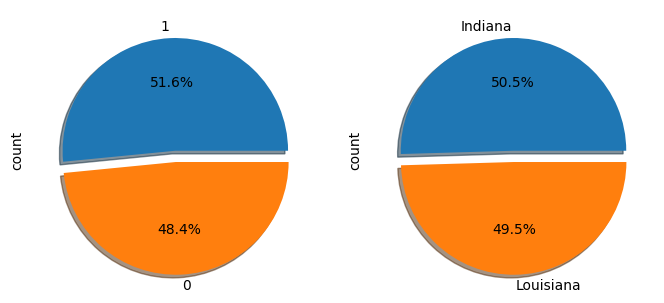

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
df_target['target'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, ax=axes[0])
df_target['state'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, ax=axes[1])

In [6]:
df = df.sample(100000)

In [12]:
df.dropna(subset='text',inplace=True,axis=0)

In [13]:
df_louisiana = df[df['state']=='Louisiana']
df_indiana= df[df['state']=='Indiana']
wc_lousiana = WordCloud(background_color='white', width=800, height=600).generate(' '.join(x for x in df_louisiana['text']))
wc_indiana = WordCloud(background_color='white', width=800, height=600).generate(' '.join(x for x in df_louisiana['text']))

# Nube de palabras

(-0.5, 799.5, 599.5, -0.5)

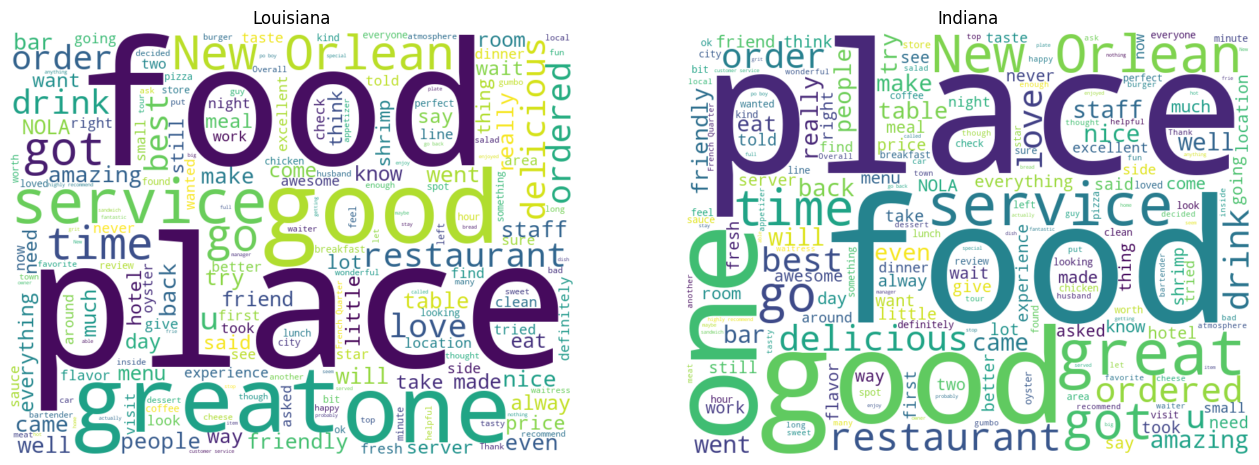

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes[0].imshow(wc_lousiana, interpolation='bilinear')
axes[0].set_title('Louisiana')
axes[0].axis('off')

# Mostrar la segunda nube de palabras
axes[1].imshow(wc_indiana, interpolation='bilinear')
axes[1].set_title('Indiana')
axes[1].axis('off')
plt.show()

#### Puntuaciones: Distribucion

Text(0.5, 1.0, 'Distribucion de las puntuaciones')

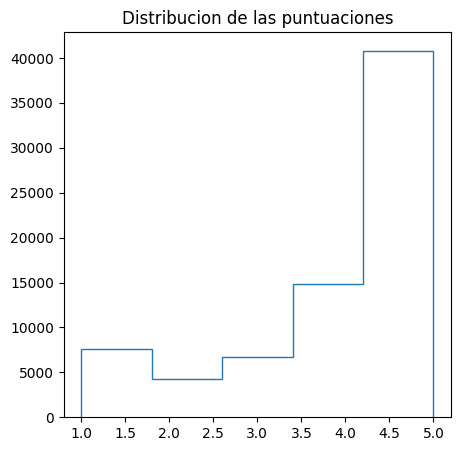

In [24]:
fig, axes = plt.subplots(figsize=(5, 5))
plt.hist(x=df['stars_review'],bins=5,histtype='step')
plt.title('Distribucion de las puntuaciones')

In [77]:
def variable_tiempo(df,variable,columnas_tiempo):
    # funcion creada para ver la acumulacion de valores en diferentes marcos temporales de una variable.
    #columnas_tiempo = ['year','quarter','month','weekday','hour','weekend']
    plt.figure(figsize=(18, 14))
    y = 3
    x = 2
    z = 1
    for col in columnas_tiempo:
        plt.subplot(x,y,z,facecolor = 'orange')
        z += 1
        df.groupby(col)[variable].sum().plot(kind='line',color='skyblue')
        plt.title(f'variable: {variable} , marco temporal: {col}')
        plt.xlabel(col)
        
        plt.ylabel(f"{variable}")


In [ ]:
df['month'] = df['date'].apply(lambda x: x.month)
df['weekday'] = df['date'].apply(lambda x: x.weekday())
df['year'] = df['date'].apply(lambda x: x.year)

### meses, dias de la semana y año

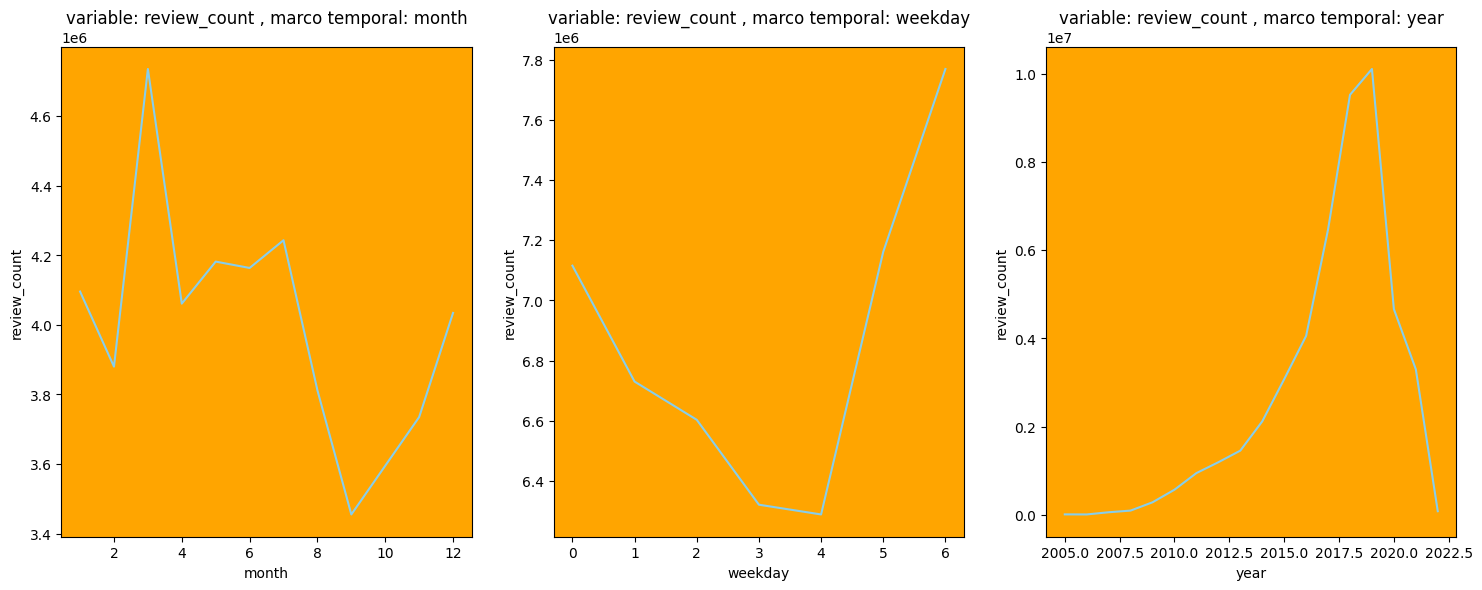

In [79]:
var = 'review_count'
cols = ['month','weekday','year']
marco_temporal = variable_tiempo(df,var,columnas_tiempo=cols)

Podemos observar los ultimos meses pueden no llegar a tener tantas reseñas como los primeros y algunos meses a mitad de año, por otro lado, vemos que con la llegada del fin de semana, aumenta la cantidad de reseñas